# Dermatology

   Существует группа заболеваний(psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.), имеющих схожие признаки, особенно на ранних стадиях. 

Данный датасет содержит информацию о признаках заболеваний имевшихся у пациентов, а так же о реальном диагнозе.

#### Постановка задачи

Задача заключается в том, чтобы исследовать имеющиеся данные, произвести обработку и подготовку данных для дальнейшей работы с ними. Используя методы машинного обучения, получить модель, с помощью которой, по имеющимся симптомам будет возможно получать как можно более точный диагноз больного. 

##### Описание признаков

Все признаки, кроме family history, принимают значения от 0 до 3.
0 - не наблюдается; 3 - наблюдается в большой степени; 1,2 - промежуточные значения.
family history = 1, если какое-либо из этих заболеваний наблюдалось в семье; 0 - иначе.

Attribute Information:
      Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
      1: erythema
      2: scaling
      3: definite borders
      4: itching
      5: koebner phenomenon
      6: polygonal papules
      7: follicular papules
      8: oral mucosal involvement
      9: knee and elbow involvement
     10: scalp involvement
     11: family history, (0 or 1)
     34: Age

     Histopathological Attributes: (take values 0, 1, 2, 3)
     12: melanin incontinence
     13: eosinophils in the infiltrate
     14: PNL infiltrate
     15: fibrosis of the papillary dermis
     16: exocytosis
     17: acanthosis
     18: hyperkeratosis
     19: parakeratosis
     20: clubbing of the rete ridges
     21: elongation of the rete ridges
     22: thinning of the suprapapillary epidermis
     23: spongiform pustule
     24: munro microabcess
     25: focal hypergranulosis
     26: disappearance of the granular layer
     27: vacuolisation and damage of basal layer
     28: spongiosis
     29: saw-tooth appearance of retes
     30: follicular horn plug
     31: perifollicular parakeratosis
     32: inflammatory monoluclear inflitrate
     33: band-like infiltrate
     
   Class code:     Class:                     Number of instances:
       1             psoriasis			             112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

считываем данные

In [2]:
data = pd.read_csv('dermatology.data', sep = ',', engine = 'python',na_values=['?']) 

определяем пропущенние данные, замененные символом '?'

### Рассмотрим структуру данных

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
print(data.shape)
print(data.columns)

(366, 35)
Index([u'erythema', u'scaling', u'definite borders', u'itching',
       u'koebner_phenomenon', u'polygonal_papules', u'follicular_papules',
       u'oral_mucosal_involvement', u'knee_and_elbow_involvement',
       u'scalp_involvement', u'family_history', u'melanin_incontinence',
       u'eosinophils_in_the_infiltrate', u'PNL_infiltrate',
       u'fibrosis_of_the_papillary_dermis', u'exocytosis', u'acanthosis',
       u'hyperkeratosis', u'parakeratosis', u'clubbing_of_the_rete_ridges',
       u'elongation_of_the_rete_ridges',
       u'thinning_of_the_suprapapillary_epidermis', u'spongiform_pustule',
       u'munro_microabcess', u'focal_hypergranulosis',
       u'disappearance_of_the_granular_layer',
       u'vacuolisation_and_damage_of_basal_layer', u'spongiosis',
       u'saw-tooth_appearance_of_retes', u'follicular_horn_plug',
       u'perifollicular_parakeratosis', u'inflammatory_monoluclear_inflitrate',
       u'band-like_infiltrate', u'Age', u'Class_code'],
      dtype='o

#### Данные содержатся в таблице, состоящей из 366 сток и 35 столбцов (34 признака + 1 выходной(целевой))

In [5]:
data

,erythema,scaling,definite borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Class_code
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41.0,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18.0,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57.0,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22.0,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30.0,4


In [6]:
data.index

RangeIndex(start=0, stop=366, step=1)

###  можем посмотреть на несколько первых и несколько последних строк этой таблицы

In [7]:
data.head()

,erythema,scaling,definite borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Class_code
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [8]:
data.tail()

,erythema,scaling,definite borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Class_code
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35.0,1


К элементам таблицы можно обращаться, например, так:

In [9]:
data.at[2, 'scaling']

1

In [10]:
data['Age']

0      55.0
1       8.0
2      26.0
3      40.0
4      45.0
5      41.0
6      18.0
7      57.0
8      22.0
9      30.0
10     20.0
11     21.0
12     22.0
13     10.0
14     65.0
15     40.0
16     30.0
17     38.0
18     23.0
19     17.0
20      8.0
21     51.0
22     42.0
23     44.0
24     22.0
25     33.0
26     10.0
27     17.0
28     43.0
29     50.0
       ... 
336    60.0
337    42.0
338    32.0
339    51.0
340    33.0
341    68.0
342    50.0
343     9.0
344    16.0
345    35.0
346    40.0
347    22.0
348    10.0
349     7.0
350    25.0
351     9.0
352    55.0
353    45.0
354    56.0
355    36.0
356    75.0
357    45.0
358    24.0
359    40.0
360    25.0
361    25.0
362    36.0
363    28.0
364    50.0
365    35.0
Name: Age, dtype: float64

In [11]:
data['family_history'][5]

0

In [12]:
data['exocytosis'].dtype.name

'int64'

In [13]:
type(data['itching'])

pandas.core.series.Series

In [14]:
type(data['itching'][3])

numpy.int64

In [15]:
data[['exocytosis', 'acanthosis']].head()

,exocytosis,acanthosis
0,3,2
1,1,2
2,1,2
3,0,2
4,1,2


С помощью метода describe() получим некоторую сводную информацию по всей таблице. По умолчанию будет выдана информация только для количественных признаков. Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

In [16]:
data.describe()

,erythema,scaling,definite borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Class_code
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

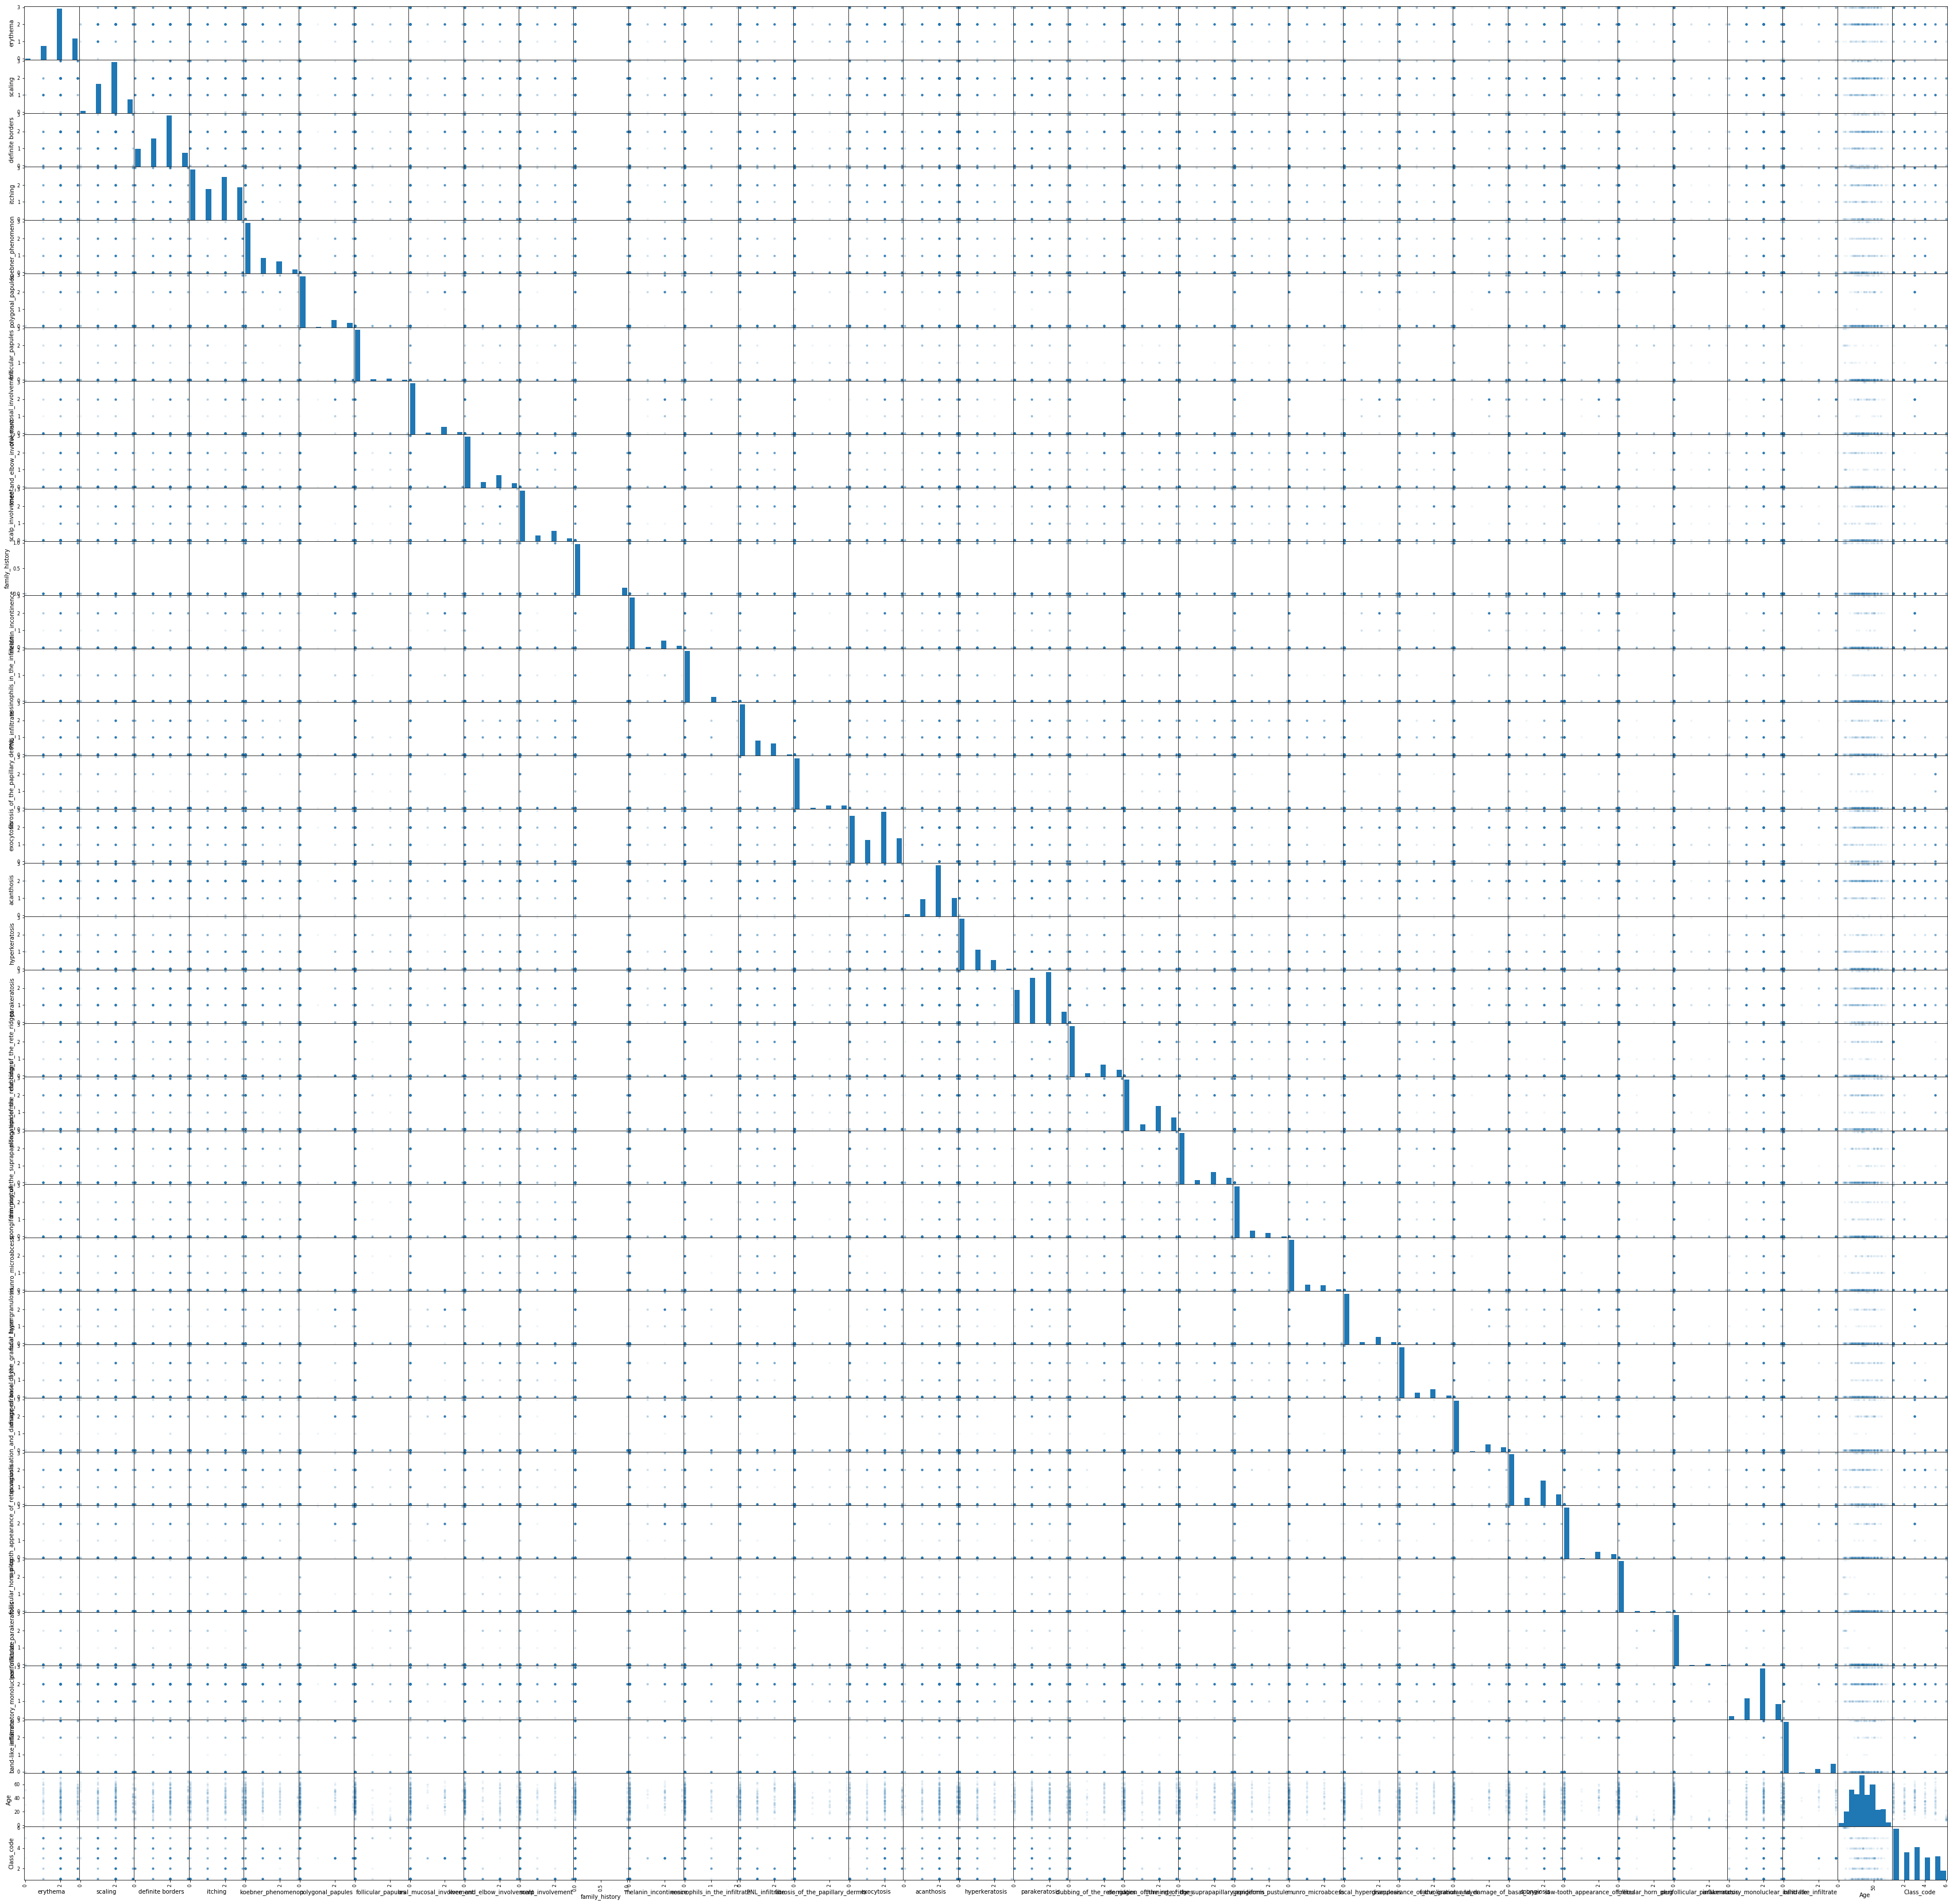

In [17]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (60, 60))
pass

In [18]:
data.corr()

,erythema,scaling,definite borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Class_code
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,...,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.005028,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,...,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.016006,-0.468688
definite borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,...,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.138493,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,...,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.048053,0.054772
koebner_phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,...,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.081162,-0.091323
polygonal_papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,...,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.096953,0.057785
follicular_papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,...,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.371368,0.477813
oral_mucosal_involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,...,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.111047,0.055805
knee_and_elbow_involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,...,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.078267,-0.383305
scalp_involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,...,0.488804,-0.252483,-0.420718,-0.257210,-0.051894,-0.017352,0.035152,-0.249975,0.036412,-0.533208


Можно выбрать любую пару признаков и нарисовать для неё график зависимости. Посторим график зависимости для признаков Age и spongiosis:

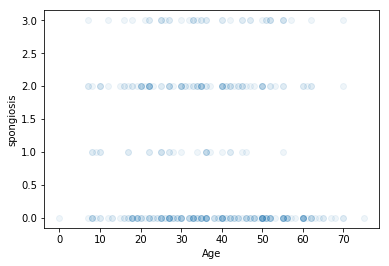

In [19]:
plt.plot(data['Age'], data['spongiosis'], 'o', alpha = 0.07)
plt.xlabel('Age')
plt.ylabel('spongiosis')
pass

И для признаков Age и scaling

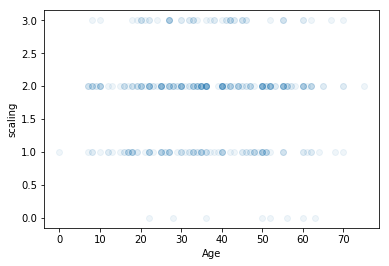

In [20]:
plt.plot(data['Age'], data['scaling'], 'o', alpha = 0.07)
plt.xlabel('Age')
plt.ylabel('scaling')
pass

In [21]:
data['Class_code'] == 1

0      False
1       True
2      False
3       True
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11     False
12     False
13      True
14     False
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25      True
26     False
27     False
28     False
29     False
       ...  
336     True
337    False
338    False
339    False
340     True
341    False
342    False
343    False
344    False
345    False
346    False
347    False
348    False
349    False
350     True
351     True
352     True
353    False
354    False
355     True
356     True
357     True
358     True
359    False
360    False
361    False
362    False
363    False
364    False
365     True
Name: Class_code, dtype: bool

Можно выбрать любую пару признаков и нарисовать диаграмму рассеяния для этой пары признаков, изображая точки, соответствующие объектам из разных классов разным цветом. Для пары признаков Age, exocytosis получааем:

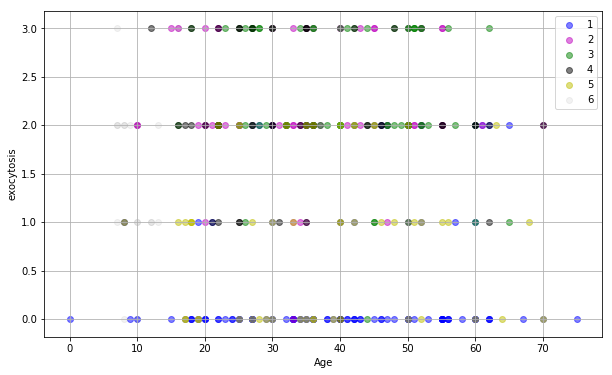

In [22]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Class_code'] == 1]['Age'].tolist(),
            data[data['Class_code'] == 1]['exocytosis'].tolist(),
            alpha = 0.5,
            label = '1',
            color = 'b')

plt.scatter(data[data['Class_code'] == 2]['Age'].tolist(),
            data[data['Class_code'] == 2]['exocytosis'].tolist(),
            alpha = 0.5,
            label = '2',
            color = 'm')

plt.scatter(data[data['Class_code'] == 3]['Age'].tolist(),
            data[data['Class_code'] == 3]['exocytosis'].tolist(),
            alpha = 0.5,
            label = '3',
            color = 'g')

plt.scatter(data[data['Class_code'] == 4]['Age'].tolist(),
            data[data['Class_code'] == 4]['exocytosis'].tolist(),
            alpha = 0.5,
            label = '4',
            color = 'black')

plt.scatter(data[data['Class_code'] == 5]['Age'].tolist(),
            data[data['Class_code'] == 5]['exocytosis'].tolist(),
            alpha = 0.5,
            label = '5',
            color = 'y')

plt.scatter(data[data['Class_code'] == 6]['Age'].tolist(),
            data[data['Class_code'] == 6]['exocytosis'].tolist(),
            alpha = 0.05,
            label = '6',
            color = 'k')

plt.xlabel('Age')
plt.ylabel('exocytosis')
plt.legend()
plt.grid()

для получения более информативного графика добавим "шум" в значения признака 'exocytosis'

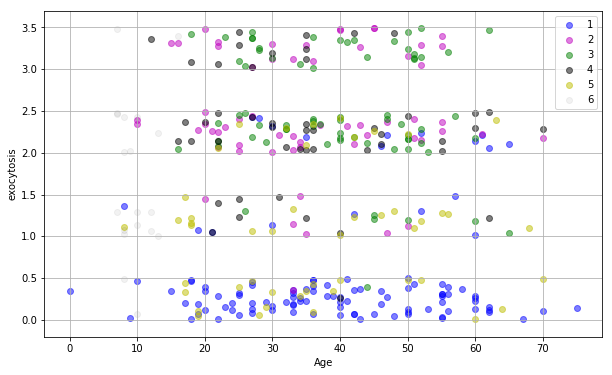

In [23]:
np.random.seed(0)
exocytosis_rnd = data['exocytosis'].astype('int32') + np.random.rand(data.shape[0])/2

plt.figure(figsize = (10, 6))

plt.scatter(data[data['Class_code'] == 1]['Age'].tolist(),
            exocytosis_rnd[data['Class_code'] == 1],
            alpha = 0.5,
            label = '1',
            color = 'b')

plt.scatter(data[data['Class_code'] == 2]['Age'].tolist(),
            exocytosis_rnd[data['Class_code'] == 2],
            alpha = 0.5,
            label = '2',
            color = 'm')

plt.scatter(data[data['Class_code'] == 3]['Age'].tolist(),
            exocytosis_rnd[data['Class_code'] == 3],
            alpha = 0.5,
            label = '3',
            color = 'g')

plt.scatter(data[data['Class_code'] == 4]['Age'].tolist(),
            exocytosis_rnd[data['Class_code'] == 4],
            alpha = 0.5,
            label = '4',
            color = 'black')

plt.scatter(data[data['Class_code'] == 5]['Age'].tolist(),
            exocytosis_rnd[data['Class_code'] == 5],
            alpha = 0.5,
            label = '5',
            color = 'y')

plt.scatter(data[data['Class_code'] == 6]['Age'].tolist(),
            exocytosis_rnd[data['Class_code'] == 6],
            alpha = 0.05,
            label = '6',
            color = 'k')

plt.xlabel('Age')
plt.ylabel('exocytosis')
plt.legend()
plt.grid()


признак 'exocytosis' практически не характерен для болезни 1 (psoriasis) вне зависимости от возраста
                                    в большей степени наблюдается при заболеваниях 2(seboreic dermatitis), 3(lichen planus)

###### Заметим, что в данном датасете категориальных признаков не содержится.

In [24]:
data.describe(include = ['object'])

ValueError: No objects to concatenate

##### Описание всех признаков

In [25]:
data.describe(include = 'all')

,erythema,scaling,definite borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Class_code
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


# Готовим данные

В данном датасете категориальных признаков не содержится.
Присутствует бинарный признак 'family history', (0 - если заболевание наблюдалось в семье, 1 - иначе).
Удалим данный признак из датасета, для работы с количественными признаками. Затем добавим его обратно.

In [26]:
data_binary = data['family_history'] 
data.drop(('family_history'), axis = 1)

,erythema,scaling,definite borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Class_code
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41.0,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18.0,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57.0,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22.0,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30.0,4


Заранее передадим данные колонки, значения которой будем предсказывать в переменную y.

In [27]:
y = data['Class_code'] 
data = data.drop(('Class_code'), axis = 1) 


Получим списки категориальных и количественных признаков

In [28]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['erythema', 'scaling', 'definite borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin_incontinence', 'eosinophils_in_the_infiltrate', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_of_the_granular_layer', 'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate', 'band-like_infiltrate', 'Age']


In [29]:
data.median(axis = 0)

erythema                                     2.0
scaling                                      2.0
definite borders                             2.0
itching                                      1.0
koebner_phenomenon                           0.0
polygonal_papules                            0.0
follicular_papules                           0.0
oral_mucosal_involvement                     0.0
knee_and_elbow_involvement                   0.0
scalp_involvement                            0.0
family_history                               0.0
melanin_incontinence                         0.0
eosinophils_in_the_infiltrate                0.0
PNL_infiltrate                               0.0
fibrosis_of_the_papillary_dermis             0.0
exocytosis                                   2.0
acanthosis                                   2.0
hyperkeratosis                               0.0
parakeratosis                                1.0
clubbing_of_the_rete_ridges                  0.0
elongation_of_the_re

Заполним пропущенные значения каждой количественной переменной её медианным значением

In [30]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [31]:
data[numerical_columns].count(axis = 0)

erythema                                    366
scaling                                     366
definite borders                            366
itching                                     366
koebner_phenomenon                          366
polygonal_papules                           366
follicular_papules                          366
oral_mucosal_involvement                    366
knee_and_elbow_involvement                  366
scalp_involvement                           366
family_history                              366
melanin_incontinence                        366
eosinophils_in_the_infiltrate               366
PNL_infiltrate                              366
fibrosis_of_the_papillary_dermis            366
exocytosis                                  366
acanthosis                                  366
hyperkeratosis                              366
parakeratosis                               366
clubbing_of_the_rete_ridges                 366
elongation_of_the_rete_ridges           

## Нормализация количественных признаков

In [32]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,erythema,scaling,definite borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.156875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [33]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [34]:
data_numerical.describe()

,erythema,scaling,definite borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
count,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,...,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02
mean,-3.822079e-17,-4.419658e-16,4.912585e-16,4.246755e-18,-1.656234e-16,-4.732098e-17,2.912060e-17,8.872684e-17,2.341782e-16,4.368091e-17,...,5.778620e-17,1.025895e-15,-8.614845e-17,5.460113e-18,-3.776578e-17,3.200233e-17,1.484847e-16,1.747236e-16,-4.246755e-17,-1.360857e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.111389e+00,-2.558821e+00,-1.707038e+00,-1.200141e+00,-6.980933e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,-6.253991e-01,-5.732151e-01,...,-4.631972e-01,-5.370349e-01,-4.778480e-01,-8.437228e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,-2.570032e+00,-5.015288e-01,-2.392826e+00
25%,-1.027539e-01,-1.133359e+00,-6.051406e-01,-1.200141e+00,-6.980933e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,-6.253991e-01,-5.732151e-01,...,-4.631972e-01,-5.370349e-01,-4.778480e-01,-8.437228e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,-1.192826e+00,-5.015288e-01,-7.434092e-01
50%,-1.027539e-01,2.921028e-01,4.967572e-01,-3.216379e-01,-6.980933e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,-6.253991e-01,-5.732151e-01,...,-4.631972e-01,-5.370349e-01,-4.778480e-01,-8.437228e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,1.843800e-01,-5.015288e-01,-8.364254e-02
75%,-1.027539e-01,2.921028e-01,4.967572e-01,5.568656e-01,4.032090e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,3.919168e-01,5.309782e-01,...,-4.631972e-01,6.191697e-01,-4.778480e-01,9.259193e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,1.843800e-01,-5.015288e-01,7.740541e-01
max,1.401564e+00,1.717565e+00,1.598655e+00,1.435369e+00,2.605814e+00,2.665663e+00,4.965637e+00,3.144472e+00,2.426548e+00,2.739365e+00,...,3.068681e+00,2.931579e+00,2.663931e+00,1.810740e+00,2.667154e+00,6.429764e+00,5.903642e+00,1.561586e+00,2.211174e+00,2.555424e+00


## X и y

#### Cоединим признаки в одну таблицу

In [35]:
data = pd.concat((data, data_binary), axis = 1)
print(data.shape)

(366, 35)


In [36]:
X = data
feature_names = X.columns

In [37]:
type(feature_names)

pandas.indexes.base.Index

In [38]:
feature_names

Index([u'erythema', u'scaling', u'definite borders', u'itching',
       u'koebner_phenomenon', u'polygonal_papules', u'follicular_papules',
       u'oral_mucosal_involvement', u'knee_and_elbow_involvement',
       u'scalp_involvement', u'family_history', u'melanin_incontinence',
       u'eosinophils_in_the_infiltrate', u'PNL_infiltrate',
       u'fibrosis_of_the_papillary_dermis', u'exocytosis', u'acanthosis',
       u'hyperkeratosis', u'parakeratosis', u'clubbing_of_the_rete_ridges',
       u'elongation_of_the_rete_ridges',
       u'thinning_of_the_suprapapillary_epidermis', u'spongiform_pustule',
       u'munro_microabcess', u'focal_hypergranulosis',
       u'disappearance_of_the_granular_layer',
       u'vacuolisation_and_damage_of_basal_layer', u'spongiosis',
       u'saw-tooth_appearance_of_retes', u'follicular_horn_plug',
       u'perifollicular_parakeratosis', u'inflammatory_monoluclear_inflitrate',
       u'band-like_infiltrate', u'Age', u'family_history'],
      dtype='object'

In [39]:
print(X.shape)
print(y.shape)
N, d = X.shape

(366, 35)
(366L,)


In [40]:
type(y)

pandas.core.series.Series

Обучаться, или, как говорят, строить модель, мы будем на обучающей выборке, а проверять качество построенной модели – на тестовой. Разобьём датасет на обучающую и тестовую части. Мы воспользуемся функцией train_test_split из модуля sklearn.cross_validation. и разобьем данные на обучающую/тестовую выборки в отношении 70%:30%:

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

(256, 110)


# $k$NN

Метод ближайших соседей — простейший метрический классификатор, основанный на оценивании сходства объектов. Классифицируемый объект относится к тому классу, которому принадлежат ближайшие к нему объекты обучающей выборки.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [43]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [44]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

knn_err_train = np.mean(y_train != y_train_predict)
knn_err_test  = np.mean(y_test  != y_test_predict)

print 'Error train:', knn_err_train
print 'Error test:', knn_err_test

Error train: 0.16015625
Error test: 0.209090909091


для числа соседей = 10 получаем тестовую ошибку = 0,2

In [45]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[31  1  0  1  0  2]
 [ 1 17  0  1  0  0]
 [ 0  0 23  0  0  0]
 [ 3  9  0  4  1  0]
 [ 1  2  0  1  9  0]
 [ 0  0  0  0  0  3]]


Попробуем улучшить наш результат

### Подбор параметров

In [46]:
from sklearn.model_selection import GridSearchCV
nnb = range(1,20)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

(0.1328125, 1)


Подбором получили наилучшее число соседей = 1.
Найдём значение ошибки на обучающей и тестовой выборке при этом значении параметра

In [47]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

knn_err_train = np.mean(y_train != knn.predict(X_train))
knn_err_test  = np.mean(y_test  != knn.predict(X_test))

print 'Error train:', knn_err_train
print 'Error test:', knn_err_test

Error train: 0.0
Error test: 0.1


Тестовая ошибка уменьшилась на 0,1; ошибка на обучающих данных отсутствует.
Метод k ближайших соседей хорошо работает для предсказания заболевания(при k=1). 

Кросс-проверка или кросс-валидация (cross-validation, CV) — процедура эмпирического оценивания обобщающей способности алгоритмов, обучаемых по прецедентам.
Фиксируется некоторое множество разбиений исходной выборки на две подвыборки: обучающую и контрольную. Для каждого разбиения выполняется настройка алгоритма по обучающей подвыборке, затем оценивается его средняя ошибка на объектах контрольной подвыборки. Оценкой скользящего контроля называется средняя по всем разбиениям величина ошибки на контрольных подвыборках.

Построим графики зависимости ошибок на обучающей и тестовой выборках и CV-ошибки от значения параметра

In [48]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

In [49]:
errs_train = []
errs_test = []
errs_cv = []
for n in nnb:
    knn = KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    errs_train.append( np.mean(y_train != knn.predict(X_train)))
    errs_test.append(np.mean(y_test  != knn.predict(X_test)))
    
    cross_val = ShuffleSplit(n_splits=10, test_size=0.3)
    accuracy = cross_val_score(knn, X, y, cv=cross_val, scoring='accuracy')
    errs_cv.append(1-accuracy.mean())

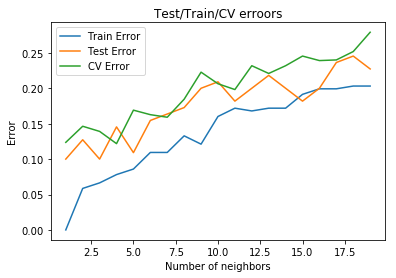

In [50]:
plt.plot(nnb,errs_train, label='Train Error')
plt.plot(nnb,errs_test, label='Test Error')
plt.plot(nnb, errs_cv, label='CV Error')
plt.title('Test/Train/CV erroors')
plt.xlabel('Number of neighbors')
plt.ylabel('Error')
plt.legend()

Наблюдаем увеличение значений ошибок с ростом числа соседей.

## Логистическая регрессия

Логистическая регрессия (Logistic regression) — метод построения линейного классификатора, позволяющий оценивать апостериорные вероятности принадлежности объектов классам.

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
logistic_model_err_train = np.mean(y != logistic_model.predict(X))
logistic_model_err_test = np.mean(y_test != logistic_model.predict(X_test))
print 'Error train:', logistic_model_err_train
print 'Error test:', logistic_model_err_test

Error train: 0.0136612021858
Error test: 0.0181818181818


Значение ошибки на тестовой выборке уменьшилось по сравнению со значением, полученным в методе knn после подбора количества соседей.

In [54]:
print(logistic_model.coef_) # Коэффициенты разделяющей гиперплоскости
print(logistic_model.intercept_)

[[ -2.75849855e-01   1.37674698e-03   1.32222248e-01  -2.99773121e-01
   -9.93222900e-02  -1.03949808e-01  -6.05077854e-01  -8.24692252e-02
    4.19148186e-01   2.21047848e-01   6.82889898e-02  -9.61780423e-02
    8.84854777e-02   2.91528318e-01  -9.85262695e-01  -5.64810016e-01
   -4.73614234e-01  -1.26973710e-01   1.54052486e-01   1.22919820e+00
    6.22286819e-01   1.42829961e+00   4.31456947e-01   3.77515066e-01
   -9.58011533e-02   2.49942843e-01  -1.04253697e-01  -1.01515126e+00
   -2.28835871e-01  -2.66037225e-01  -3.95941174e-01  -5.83664385e-02
   -2.24643432e-01  -1.45004376e-02   6.82889898e-02]
 [ -2.48205796e-01   4.93608246e-01   6.49620732e-02   5.92261260e-01
   -1.78718363e+00  -4.58455166e-01  -7.17269908e-01  -2.78344949e-01
   -3.31285468e-01  -1.82584351e-01  -1.04115152e-01  -3.30478533e-01
    7.93983147e-01   1.40209629e+00  -1.19606495e+00  -3.75659868e-02
    1.32910388e-01  -4.42029770e-01  -5.05026969e-01  -8.37701172e-01
   -5.09526256e-01  -8.56338733e-01 

In [55]:
errs_train, errs_test, errs_cv = [], [], []
C_values = np.arange (0.1, 3, 0.1)
for c in C_values:
    logistic_model = LogisticRegression(C=c)
    logistic_model.fit(X_train, y_train)
    errs_train.append( np.mean(y_train != logistic_model.predict(X_train)))
    errs_test.append(np.mean(y_test  != logistic_model.predict(X_test)))
    
    cross_val = ShuffleSplit(n_splits=3, test_size=0.3)
    accuracy = cross_val_score(logistic_model, X, y, cv=cross_val, scoring='accuracy')
    errs_cv.append(1-accuracy.mean())

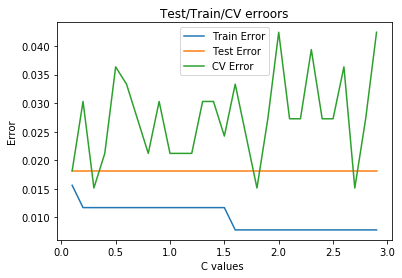

In [56]:
plt.plot(C_values,errs_train, label='Train Error')
plt.plot(C_values,errs_test, label='Test Error')
plt.plot(C_values, errs_cv, label='CV Error')
plt.title('Test/Train/CV erroors')
plt.xlabel('C values ')
plt.ylabel('Error')
plt.legend()

In [57]:
min_cv_error = min(errs_cv)
print'Minimum CV-Error = ',min_cv_error
best_C_value = C_values[errs_cv.index(min_cv_error)]
print'Best C parameter value = ', best_C_value
logistic_model = LogisticRegression(C=c)
logistic_model.fit(X_train, y_train)
logistic_model_err_train = np.mean(y != logistic_model.predict(X))
logistic_model_err_test = np.mean(y_test != logistic_model.predict(X_test))
print 'Error train:', logistic_model_err_train
print 'Error test:', logistic_model_err_test

Minimum CV-Error =  0.0151515151515
Best C parameter value =  0.3
Error train: 0.0109289617486
Error test: 0.0181818181818


В результате не удалось уменьшить значение ошибки на тестовых данных.

In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(logistic_model.predict(X_test), y_test))

[[35  0  0  0  0  0]
 [ 0 19  0  2  0  0]
 [ 0  0 23  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0  3]]


Стоит отметить, что нам удаётся получить довольно хорошую классификацию данных.

## LDA


Линейный дискриминантный анализ (ЛДА) — метод статистики и машинного обучения, применяемый для нахождения линейных комбинаций признаков, наилучшим образом разделяющих два или более класса объектов или событий.

In [59]:
from sklearn import discriminant_analysis
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [60]:
lda_err_train = np.mean(y != lda.predict(X))
lda_err_test = np.mean(y_test != lda.predict(X_test))
print 'Error train:', lda_err_train
print 'Error test:', lda_err_test

Error train: 0.0245901639344
Error test: 0.0454545454545


In [61]:
print lda.priors_

[ 0.30078125  0.1640625   0.19140625  0.125       0.15234375  0.06640625]


Метод LDA незначительно проигрывает методу логистической регрессии, однако, имееет преимущество перед методом knn

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(lda.predict(X_test), y_test))

[[33  0  0  0  0  0]
 [ 2 18  0  1  0  0]
 [ 0  0 23  0  0  0]
 [ 0  1  0 16  1  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  3]]


## QDA

In [63]:
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [64]:
qda_err_train = np.mean(y != qda.predict(X))
qda_err_test = np.mean(y_test != qda.predict(X_test))
print 'Error train:', qda_err_train
print 'Error test:', qda_err_test

Error train: 0.106557377049
Error test: 0.136363636364


Значение тестовой ошибки увеличилось. Попробуем подобрать параметры модели.

In [65]:
errs_train, errs_test, errs_cv = [], [], []
reg_params = np.arange(0.05, 1.0, 0.05)
for param in reg_params:
    qda = discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param = param)
    qda.fit(X_train, y_train)
    errs_train.append( np.mean(y_train != qda.predict(X_train)))
    errs_test.append(np.mean(y_test  != qda.predict(X_test)))
    
    cross_val = ShuffleSplit(n_splits=3, test_size=0.3)
    accuracy = cross_val_score(qda, X, y, cv=cross_val, scoring='accuracy')
    errs_cv.append(1-accuracy.mean())

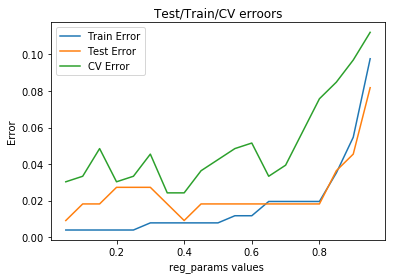

In [66]:
plt.plot(reg_params,errs_train, label='Train Error')
plt.plot(reg_params,errs_test, label='Test Error')
plt.plot(reg_params, errs_cv, label='CV Error')
plt.title('Test/Train/CV erroors')
plt.xlabel('reg_params values ')
plt.ylabel('Error')
plt.legend()

In [67]:
from sklearn.model_selection import GridSearchCV
reg_params = np.arange(0.05, 1.0, 0.05)
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
grid = GridSearchCV(qda, param_grid = {'reg_param': reg_params}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_reg_param_value = grid.best_estimator_.reg_param
print'Best regularization parameter value = ', best_reg_param_value
print 'Minimum CV-Error = ' ,best_cv_err

Best regularization parameter value =  0.7
Minimum CV-Error =  0.04296875


In [68]:
qda = discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param = best_reg_param_value)
qda.fit(X_train, y_train)
qda_err_train = np.mean(y != qda.predict(X))
qda_err_test = np.mean(y_test != qda.predict(X_test))
print 'Error train:', qda_err_train
print 'Error test:', qda_err_test

Error train: 0.0191256830601
Error test: 0.0181818181818


В результате изменения параметров, нам удалось уменьшить значение ошибки на тестовых данных.

## SVM

In [69]:
from sklearn.svm import SVC # "Support Vector Classifier"
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
svc_train_predict = svc_model.predict(X_train)
svc_test_predict = svc_model.predict(X_test)

svc_err_train = 1 - svc_model.score(X_train, y_train)
svc_err_test = 1 - svc_model.score(X_test, y_test)

print('Error train %f \nError test %f'
      %(svc_err_train, svc_err_test))

Error train 0.019531 
Error test 0.072727


Со значением параметров по умолчанию (в частности, ядро – радиальное rbf) получаем довольно маленькую тестовую ошибку, немного уступающую некоторым из предыдущих методов.
Посмотрим на значения ошибки для различных типов ядра.

#### Радиальное ядро

Попытаемся найти лучшее значение параметра C для радиального ядра.

In [71]:
from sklearn.grid_search import GridSearchCV
C_array = np.arange(0.1, 1.5, 0.1)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print 'CV error = ', 1 - grid.best_score_
print 'best C = ', grid.best_estimator_.C

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


CV error =  0.12109375
best C =  1.4


In [72]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

svc_rad_err_train = np.mean(y_train != svc.predict(X_train))
svc_rad_err_test  = np.mean(y_test  != svc.predict(X_test))
print('Error train %f \nError test %f'
      %(svc_rad_err_train, svc_rad_err_test))

Error train 0.003906 
Error test 0.054545


#### Линейное ядро

In [73]:
C_array = np.arange(0.1, 1.5, 0.1)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print 'CV error = ', 1 - grid.best_score_
print 'best C = ', grid.best_estimator_.C

CV error =  0.04296875
best C =  0.1


In [74]:
svc = SVC(kernel='linear', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

svc_lin_err_train = np.mean(y_train != svc.predict(X_train))
svc_lin_err_test  = np.mean(y_test  != svc.predict(X_test))
print('Error train %f \nError test %f'
      %(svc_lin_err_train, svc_lin_err_test))

Error train 0.011719 
Error test 0.018182


#### Полиномиальное ядро

In [75]:
C_array = np.arange(0.1, 1.5, 0.1)
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print 'CV error = ', 1 - grid.best_score_
print 'best C = ', grid.best_estimator_.C

CV error =  0.09375
best C =  0.1


In [76]:
svc = SVC(kernel='poly', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

svc_pol_err_train = np.mean(y_train != svc.predict(X_train))
svc_pol_err_test  = np.mean(y_test  != svc.predict(X_test))
print('Error train %f \nError test %f'
      %(svc_pol_err_train, svc_pol_err_test))

Error train 0.000000 
Error test 0.027273


#### Сигмоидальное ядро

In [77]:
C_array = np.arange(0.1, 3, 0.1)
svc = SVC(kernel='sigmoid')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print 'CV error = ', 1 - grid.best_score_
print 'best C = ', grid.best_estimator_.C

CV error =  0.69921875
best C =  0.1


In [78]:
svc = SVC(kernel='sigmoid', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

svc_sig_err_train = np.mean(y_train != svc.predict(X_train))
svc_sig_err_test  = np.mean(y_test  != svc.predict(X_test))
print('Error train %f \nError test %f'
      %(svc_sig_err_train, svc_sig_err_test))

Error train 0.699219 
Error test 0.681818


Построим график зависимости ошибок от значения параметра C для разльчных ядер

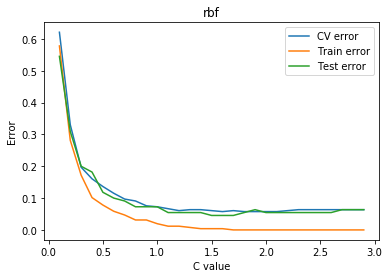

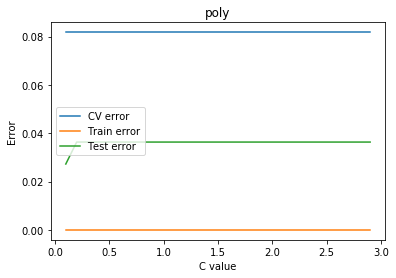

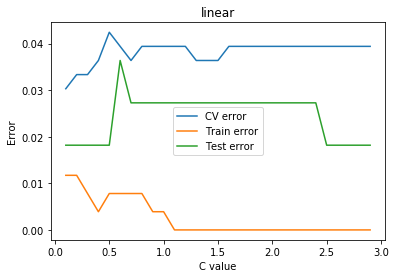

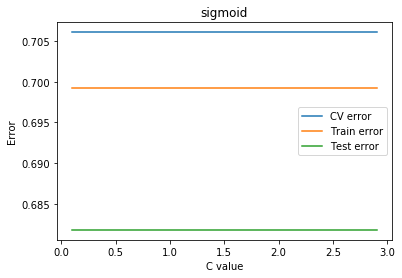

In [79]:
errs_train, errs_test, errs_cv = [[],[],[],[]], [[],[],[],[]] ,[[],[],[],[]]

C_values = np.arange(0.1, 3, 0.1)
kernel = ['rbf', 'poly', 'linear', 'sigmoid']
for c in C_values:
    for k in kernel:
        svc = SVC(kernel = k, C = c)
        svc.fit(X_train, y_train)
        err_train = np.mean(y_train != svc.predict(X_train))
        err_test = np.mean(y_test != svc.predict(X_test))
        errs_train[kernel.index(k)].append(err_train)
        errs_test[kernel.index(k)].append(err_test)        
        cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
        accuracy = cross_val_score(svc, X, y, cv=cv, scoring='accuracy')
        errs_cv[kernel.index(k)].append(1-accuracy.mean()) 

            
for i in range(len(errs_cv)):
    plt.plot(C_values, errs_cv[i], label='CV error')
    plt.plot(C_values, errs_train[i], label = 'Train error')
    plt.plot(C_values, errs_test[i], label = 'Test error')
    plt.legend()
    plt.title(kernel[i])
    plt.xlabel('C value')
    plt.ylabel('Error')
    plt.show()


Метод опорных веторов даёт так же довольно маленькую ошибку на тестовой выборке (кроме сигмоидального ядра). Наименьшую ошибку (равную 0,018182) получаем при линейном ядре.

## Наивный Байесовский классификатор

###### Распределение Гаусса

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_err_train = 1 - gnb.score(X_train, y_train)
gnb_err_test = 1 - gnb.score(X_test, y_test) 
print('Error train %f \nError test %f'
      %(gnb_err_train, gnb_err_test))

Error train 0.113281 
Error test 0.109091


Проигрывает всем предыдущим методам

###### Распределение Бернулли

In [81]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

bnb_err_train = 1 - bnb.score(X_train, y_train)
bnb_err_test = 1 - bnb.score(X_test, y_test) 
print('Error train %f \nError test %f'
      %(bnb_err_train, bnb_err_test))

Error train 0.015625 
Error test 0.027273


## Результаты

In [123]:
print ('kNN %f \nLDA %f \nQDA %f \nLogistic Model  %f \nSVC_rad %f \nSVC_lin %f \nSVC_pol %f \nSVC_sig  %f \nGaussianNB  %f \nBernoulliNB %f'
      %(knn_err_test, lda_err_test, qda_err_test, logistic_model_err_test, svc_rad_err_test, svc_lin_err_test, svc_pol_err_test, svc_sig_err_test, gnb_err_test, bnb_err_test))

kNN 0.100000 
LDA 0.045455 
QDA 0.018182 
Logistic Model  0.018182 
SVC_rad 0.054545 
SVC_lin 0.018182 
SVC_pol 0.027273 
SVC_sig  0.681818 
GaussianNB  0.109091 
BernoulliNB 0.027273


Наименьшее значение ошибки на тестовых данных, которое удалось получить = 0,018182.
Науличшие результаты показали методы Логистической регрессии, QDA и SVM с линейным ядром.

## Random Forests

In [82]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [94]:
rf_err_train = np.mean(y_train != rf.predict(X_train))
rf_err_test = np.mean(y_test != rf.predict(X_test))
print('Error train %f \nError test %f'
      %(rf_err_train, rf_err_test))

Error train 0.000000 
Error test 0.054545


При количестве деревьев равном 100, получаем обучающую ошибку 0,0 и тестовую ошибку 0,054

Постороим график зависимости значений ошибок от количества деревьев

In [124]:
rf_errs_train, rf_errs_test, rf_oob_err = [], [], []
n_estim = np.arange(1, 50, 1)
for n in n_estim:
    rf = ensemble.RandomForestClassifier(n_estimators=n, oob_score = True)
    rf.fit(X_train, y_train)
    rf_errs_train.append( np.mean(y_train != rf.predict(X_train)))
    rf_errs_test.append(np.mean(y_test  != rf.predict(X_test)))
    rf_oob_err.append(1 - rf.oob_score_)
    
#     cross_val = ShuffleSplit(n_splits=3, test_size=0.3)
#     accuracy = cross_val_score(rf, X, y, cv=cross_val, scoring='accuracy')
#     rf_errs_cv.append(1-accuracy.mean())

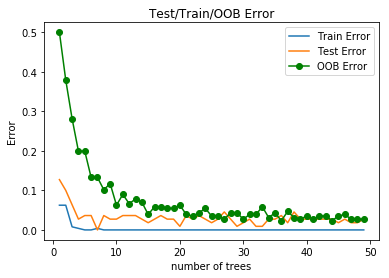

In [125]:
plt.plot(n_estim,rf_errs_train, label='Train Error')
plt.plot(n_estim,rf_errs_test, label='Test Error')
# plt.plot(n_estim, rf_errs_cv, label='CV Error')
plt.plot(n_estim, rf_oob_err, 'g-o', label = 'OOB Error')
plt.title('Test/Train/OOB Error')
plt.xlabel('number of trees')
plt.ylabel('Error')
plt.legend()

Найдём минимальные значения тестовой и обучающей ошибок:

In [148]:
rf_min_train_err = np.min(rf_errs_train)
rf_min_test_err = np.min(rf_errs_test)
print(rf_min_train_err, rf_min_test_err)

(0.0, 0.0)


Выберем оптимальное количество деревьев

In [126]:
min_rf_oob_err = np.min(rf_oob_err)
print(min_rf_oob_err)

0.0234375


In [127]:
trees_opt = n_estim[rf_oob_err == min_rf_oob_err]
trees_opt = trees_opt[0]
print(trees_opt)

36


Минимальное значение ООВ-ошибки = 0,023 получили при количестве деревьев = 36

#### Отбор признаков (Feature Selection) с помощью алгоритма случайного леса

In [88]:
features = X.columns.values
rf = ensemble.RandomForestClassifier() 
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [89]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'thinning_of_the_suprapapillary_epidermis' (0.1134)
 2. feature 'clubbing_of_the_rete_ridges' (0.0868)
 3. feature 'fibrosis_of_the_papillary_dermis' (0.0867)
 4. feature 'vacuolisation_and_damage_of_basal_layer' (0.0742)
 5. feature 'band-like_infiltrate' (0.0555)
 6. feature 'PNL_infiltrate' (0.0554)
 7. feature 'elongation_of_the_rete_ridges' (0.0428)
 8. feature 'focal_hypergranulosis' (0.0367)
 9. feature 'koebner_phenomenon' (0.0321)
10. feature 'follicular_horn_plug' (0.0321)
11. feature 'spongiosis' (0.0316)
12. feature 'itching' (0.0290)
13. feature 'scalp_involvement' (0.0260)
14. feature 'oral_mucosal_involvement' (0.0257)
15. feature 'perifollicular_parakeratosis' (0.0255)
16. feature 'disappearance_of_the_granular_layer' (0.0229)
17. feature 'saw-tooth_appearance_of_retes' (0.0205)
18. feature 'Age  ' (0.0204)
19. feature 'parakeratosis' (0.0196)
20. feature 'exocytosis' (0.0195)
21. feature 'polygonal_papules' (0.0176)
22. feature 'inflamm

Построим столбцовую диаграмму, графически представляющую значимость первых 20 признаков:

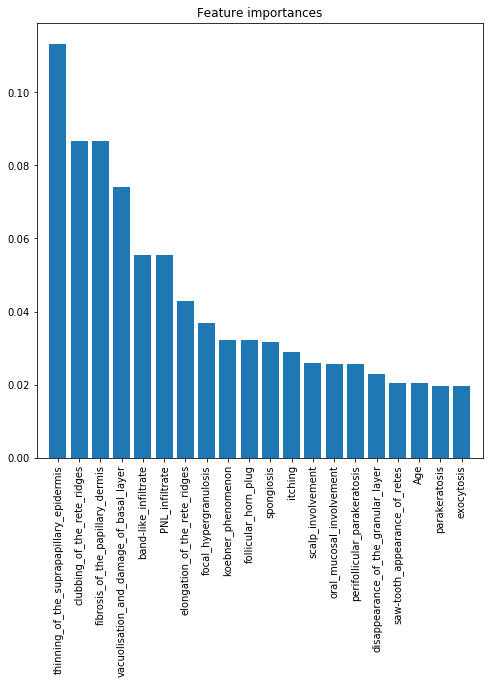

In [90]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

## Extreme Random Trees

In [92]:
ert = ensemble.ExtraTreesClassifier(n_estimators=100)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [95]:
ert_err_train = np.mean(y_train != ert.predict(X_train))
ert_err_test = np.mean(y_test != ert.predict(X_test))
print('Error train %f \nError test %f'
      %(ert_err_train, ert_err_test))

Error train 0.000000 
Error test 0.027273


Значение обучающей ошибки совпадает со значением для Random Forests. Тестовая ошибка немного уменьшилась.

Постороим график зависимости значений ошибок от количества деревьев

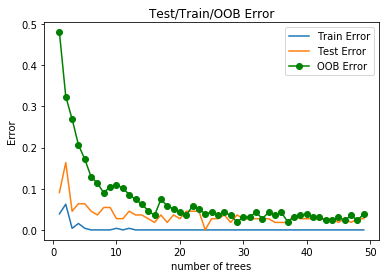

In [130]:
ert_errs_train, ert_errs_test, ert_oob_err = [], [], []
n_estim = np.arange(1, 50, 1)
for n in n_estim:
    ert = ensemble.ExtraTreesClassifier(n_estimators=n,oob_score = True, bootstrap = True)
    ert.fit(X_train, y_train)
    ert_errs_train.append( np.mean(y_train != ert.predict(X_train)))
    ert_errs_test.append(np.mean(y_test  != ert.predict(X_test)))
    ert_oob_err.append(1 - ert.oob_score_)

    
plt.plot(n_estim,ert_errs_train, label='Train Error')
plt.plot(n_estim,ert_errs_test, label='Test Error')
plt.plot(n_estim,ert_oob_err, 'g-o', label = 'OOB Error')

plt.title('Test/Train/OOB Error')
plt.xlabel('number of trees')
plt.ylabel('Error')
plt.legend()

Найдём минимальные значения тестовой и обучающей ошибок:

In [147]:
ert_min_train_err = np.min(ert_errs_train)
ert_min_test_err = np.min(ert_errs_test)
print(ert_min_train_err, ert_min_test_err)

(0.0, 0.0)


Минимальное значение ООВ ошибки

In [131]:
min_ert_oob_err = np.min(ert_oob_err)
print(min_ert_oob_err)

0.01953125


In [132]:
trees_opt = n_estim[ert_oob_err == min_ert_oob_err]
trees_opt = trees_opt[0]
print(trees_opt)

29


Минимальное значение ООВ-ошибки = 0.019 получили при количестве деревьев = 29. По сравнению с Random Rorests минимальное значение ООВ ошибки незначительно уменьшилось.

## AdaBoost

In [141]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [142]:
ada_err_train = np.mean(y_train != ada.predict(X_train))
ada_err_test = np.mean(y_test != ada.predict(X_test))
print('Error train %f \nError test %f'
      %(ada_err_train, ada_err_test))

Error train 0.230469 
Error test 0.254545


Для 100 деревьев обучающая и тестовая ошибки увеличились.

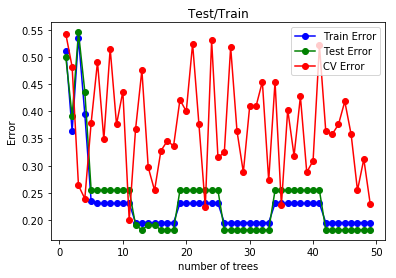

In [149]:
ada_errs_train, ada_errs_test,ada_errs_cv = [], [], []
n_estim = np.arange(1, 50,1)
for n in n_estim:
    ada = ensemble.AdaBoostClassifier(n_estimators=n, random_state=123)
    ada.fit(X_train, y_train)
    ada_errs_train.append( np.mean(y_train != ada.predict(X_train)))
    ada_errs_test.append(np.mean(y_test  != ada.predict(X_test)))
    
    cross_val = ShuffleSplit(n_splits=3, test_size=0.3)
    accuracy = cross_val_score(ada, X, y, cv=cross_val, scoring='accuracy')
    ada_errs_cv.append(1-accuracy.mean())
    
plt.plot(n_estim,ada_errs_train,'b-o', label='Train Error')
plt.plot(n_estim,ada_errs_test,'g-o', label='Test Error')
plt.plot(n_estim, ada_errs_cv,'r-o', label='CV Error')
plt.title('Test/Train')
plt.xlabel('number of trees')
plt.ylabel('Error')
plt.legend()

Наблюдаем интересное поведение обучающей и тестовой ошибок при изменении числа деревьев. Наблюдаются переодичские скачки и падения значений ошибок со значительной амплитудой. Оптимальные значения ошибок достигаются в локальных минимумах.

Минимальные значения ошибок:

In [153]:
ada_min_train_err = np.min(ada_errs_train)
ada_min_test_err = np.min(ada_errs_test)
ada_min_errs_cv  = np.min(ada_errs_cv)

print(ada_min_train_err, ada_min_test_err, ada_min_errs_cv)

(0.1953125, 0.18181818181818182, 0.20000000000000007)


Минимальные значения ошибок существенно увеличились по сравнению со значениями для Random Rorests и Extreme Random Forests.

In [155]:
best_n_estimators = n_estim[ada_errs_test == ada_min_test_err]
best_n_estimators

array([13, 16, 17, 18, 26, 27, 28, 29, 30, 31, 32, 33, 42, 43, 44, 45, 46,
       47, 48, 49])

## GBT

In [101]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [102]:
gbt_err_train = np.mean(y_train != gbt.predict(X_train))
gbt_err_test = np.mean(y_test != gbt.predict(X_test))
print('Error train %f \nError test %f'
      %(gbt_err_train, gbt_err_test))

Error train 0.000000 
Error test 0.018182


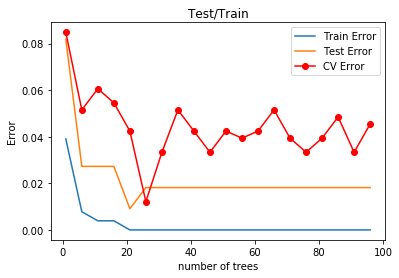

In [158]:
gbt_errs_train, gbt_errs_test, gbt_errs_cv = [], [], []
n_estim = np.arange(1, 100, 5)
for n in n_estim:
    gbt = ensemble.GradientBoostingClassifier(n_estimators=n)
    gbt.fit(X_train, y_train)
    gbt_errs_train.append( np.mean(y_train != gbt.predict(X_train)))
    gbt_errs_test.append(np.mean(y_test  != gbt.predict(X_test)))
    
    cross_val = ShuffleSplit(n_splits=3, test_size=0.3)
    accuracy = cross_val_score(gbt, X, y, cv=cross_val, scoring='accuracy')
    gbt_errs_cv.append(1-accuracy.mean())
    

    
plt.plot(n_estim,gbt_errs_train, label='Train Error')
plt.plot(n_estim,gbt_errs_test, label='Test Error')
plt.plot(n_estim, gbt_errs_cv,'r-o', label='CV Error')
plt.title('Test/Train')
plt.xlabel('number of trees')
plt.ylabel('Error')
plt.legend()

In [159]:
gbt_min_train_err = np.min(gbt_errs_train)
gbt_min_test_err = np.min(gbt_errs_test)
gbt_min_errs_cv  = np.min(gbt_errs_cv)

print(gbt_min_train_err, gbt_min_test_err, gbt_min_errs_cv)

(0.0, 0.0090909090909090905, 0.012121212121212088)


Получаем наименьшую тестовую ошибку

In [161]:
gbt_best_n_estimators = n_estim[gbt_errs_test == gbt_min_test_err]
gbt_best_n_estimators

array([21])

##### В результате классификаторы Random Forests, Extreme Random Trees, Dradient Boosted Trees показали низкие значения обучающей и тестовой ошибок. Результаты для AdaBoost оказались наихудшими. 

## Principal component analysis (PCA)

Метод главных компонент — один из основных способов уменьшения размерности данных.

In [162]:
from sklearn.decomposition import PCA

Уменьшим размерность до 20

In [163]:
pca = PCA(n_components = 20)
X_train_reduc = pca.fit_transform(X_train)
X_test_reduc = pca.transform(X_test)

Обучаем классификатор Gradient Boosted Trees (число деревьев = 100)

In [164]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100)
gbt.fit(X_train_reduc, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [165]:
gbt_err_train_reduc = np.mean(y_train != gbt.predict(X_train_reduc))
gbt_err_test_reduc = np.mean(y_test != gbt.predict(X_test_reduc))
print('Error train %f \nError test %f'
      %(gbt_err_train_reduc, gbt_err_test_reduc))

Error train 0.000000 
Error test 0.027273


Построим график зависимости ошибок от количества компонент в методе.

In [168]:
components_arr = np.arange(1, 35, 1)
test_err = []
train_err = []
cv_errors = []

for components in components_arr:
    pca = PCA(n_components = components)
    X_train_reduc = pca.fit_transform(X_train)
    X_test_reduc = pca.transform(X_test)
    rf = ensemble.RandomForestClassifier(n_estimators = 30, oob_score=True, bootstrap=True)
    rf.fit(X_train_reduc, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train_reduc)))
    test_err.append(np.mean(y_test  != rf.predict(X_test_reduc)))
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=123)
    scores = cross_val_score(gbt, X, y, cv=cv, scoring='accuracy')
    cv_errors.append(1 - scores.mean())

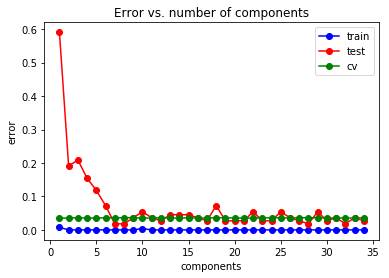

In [169]:
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, cv_errors, 'g-o', label = 'cv')
plt.title('Error vs. number of components')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

In [174]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
min_cv_err = np.min(cv_errors)
print(min_train_err, min_test_err, min_cv_err)

(0.0, 0.018181818181818181, 0.035454545454545405)


In [176]:
components_opt = []
for i in range(len(components_arr )):
    if((test_err[i] == min_test_err) and (train_err[i] == min_train_err)):
        components_opt.append(components_arr [i])
print(components_opt)

[7, 8, 28, 32]


Gradient Boosted Trees показывает хорошие результаты при использовании всего 7 компонент.

### Выводы

Имеющийся набор признаков и данное количество информации позволяет нам получить довольно точную классификацию. В подавляющем большинстве методов наблюдаются низкие значения тестовых ошибок. Применнение метода сокращения размерности позволяет сохранить высокую точность классификации при небольшом количестве используемых главных компонент.